In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from yellowbrick.model_selection import FeatureImportances
import scikitplot as skplt
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import time

In [143]:
white_wine = pd.read_csv("winequality-white.csv")
red_wine = pd.read_csv("winequality-red.csv")

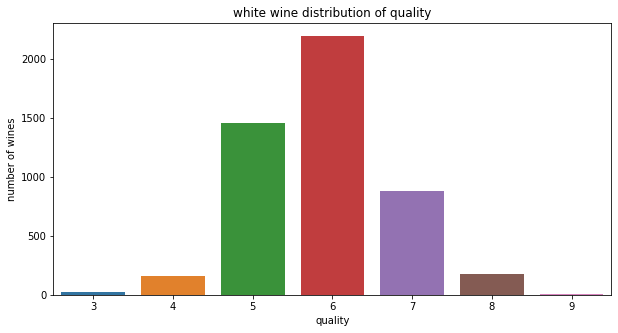

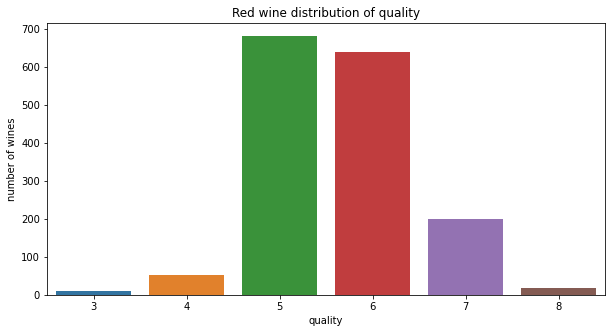

In [41]:
temp = white_wine["quality"].value_counts()
df = pd.DataFrame({'quality': temp.index,
                   'number of wines': temp.values
                  })
plt.figure(figsize=(10,5))
plt.title("white wine distribution of quality")
sns.barplot(x = 'quality', y="number of wines", data=df)
plt.show()

temp = red_wine["quality"].value_counts()
df = pd.DataFrame({'quality': temp.index,
                   'number of wines': temp.values
                  })
plt.figure(figsize=(10,5))
plt.title("Red wine distribution of quality")
sns.barplot(x = 'quality', y="number of wines", data=df)
plt.show()


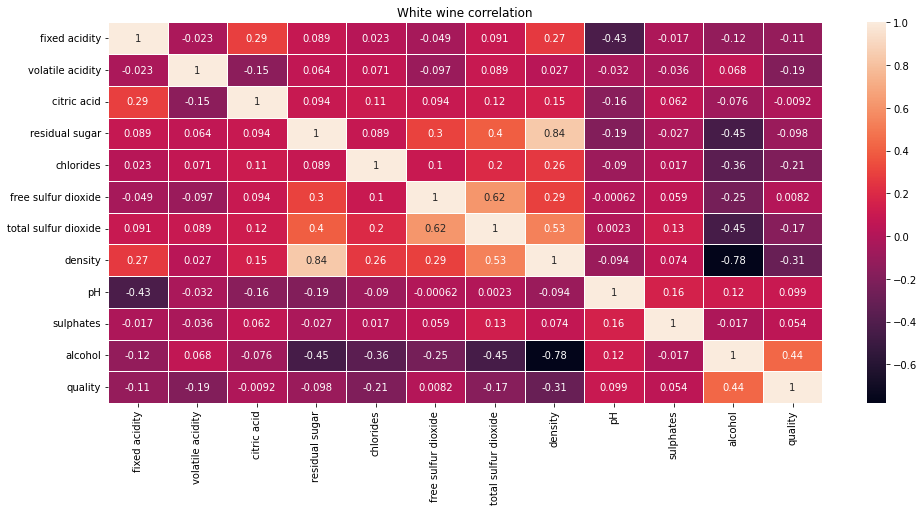

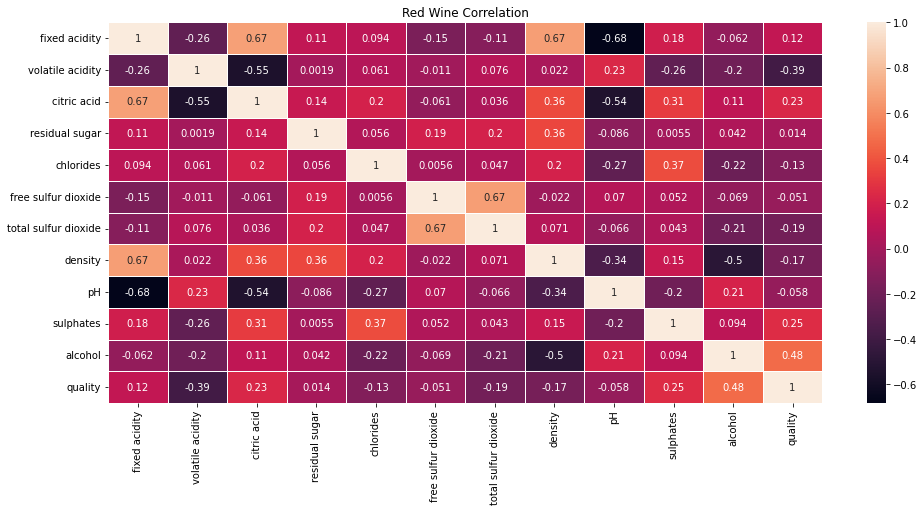

In [7]:
plt.figure(figsize=(16, 7))

# Finding the correlation between the columns in the dataset
plt.title('White wine correlation')
sns.heatmap(white_wine.corr(), annot=True, fmt='0.2g', linewidths=1)
plt.show()

plt.figure(figsize=(16, 7))
plt.title('Red Wine Correlation')
sns.heatmap(red_wine.corr(), annot=True, fmt='0.2g', linewidths=1)

plt.show()

While most correlations are fairly weak, where both wines are concerned there are a couple things here we can note:
    <ul>
        <li>
            total sulfure dioxide and free sulfur dioxide have a clear positive correlation but that's to be expected since one is a subset of the other
        </li>
        <li>
            where quality is concerned it is evident that while there are some positive correlations, it is evident that the variable that has the highest positive correlation with quality is alchol
        </li>
    </ul>

What we can note on the correlation heat map for white wine is this:
<ul>
        <li>
            Residual sugar has very high positive correlation with the density of the wine, which has a non-trivial negative correlation on quality, as is reflected in the negative correlation with residual sugar directly.
        </li>
        <li>
            alcohol, in addition to having the highest positive correlation with quality, it also has a very high negative correlation with density, whose negative correlation with quality is relatively high.
        </li>
    </ul>

What we can note on the correlation heat map for red wine is this:
<ul>
    <li>
        Residual sugar has very high positive correlation with the density of the wine, which has a non-trivial negative correlation on quality, as is reflected in the negative correlation with residual sugar directly.
    </li>
    <li>
        there are some high negative correlations where pH and acidity is concerned in most cases, except for in the case of volitile acitidy, in which case it has a non-trivial positive correlation.
    </li>
</ul>

In [8]:
grid_dict = {}
acc_dict = {}
time_dict = {}

In [144]:
# Dropping total sulfur dioxide for white
#white_wine = white_wine.drop('total sulfur dioxide', axis=1)
white_wine = white_wine.drop('residual sugar', axis=1)
# Dropping free sulfur dioxide for red
red_wine = red_wine.drop('residual sugar', axis=1)
#red_wine = red_wine.drop('total sulfur dioxide', axis=1)

red_wine["Wine"] = "RED"
white_wine["Wine"] = "WHITE"

wines = pd.merge(white_wine, red_wine, how='outer')
wines = wines.drop('Wine', axis=1)
y_wines = wines['quality']
X_wines = wines.drop('quality', axis=1)

red_wine = red_wine.drop('Wine', axis=1)
white_wine = white_wine.drop('Wine', axis=1)

# Assigning X to data and y to target
y_white = white_wine['quality']
X_white = white_wine.drop('quality', axis=1)
# Assigning X to data and y to target for red
y_red = red_wine['quality']
X_red = red_wine.drop('quality', axis=1)


In [97]:
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.25, stratify=y_white, random_state=42)

# Red
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.25, stratify=y_red, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_wines, X_wines, test_size=0.25, stratify=y_wines, random_state=42)

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,residual sugar
245,6.9,0.400,0.56,0.043,40.0,0.99750,3.14,0.46,8.7,NaN
4718,4.8,0.225,0.38,0.074,47.0,0.99132,3.31,0.40,10.3,NaN
3325,6.8,0.250,0.28,0.035,42.0,0.99048,3.12,0.38,12.6,NaN
1420,7.6,0.140,0.74,0.040,27.0,0.99160,3.07,0.40,10.8,NaN
6112,10.2,0.330,0.46,0.081,NaN,0.99628,3.10,0.48,10.4,1.9
...,...,...,...,...,...,...,...,...,...,...
5162,12.5,0.560,0.49,0.064,NaN,0.99990,3.08,0.87,10.9,2.4
838,7.3,0.250,0.36,0.034,30.0,0.99085,3.25,0.40,11.9,NaN
4767,6.6,0.190,0.25,0.052,34.0,0.99352,3.30,0.42,9.4,NaN
2152,7.0,0.220,0.33,0.052,15.0,0.99300,3.20,0.41,10.6,NaN


In [11]:
# Normalizing the data
# White
std_white = StandardScaler()
X_train_white = std_white.fit_transform(X_train_white)
X_test_white = std_white.transform(X_test_white)

# Red
std_red = StandardScaler()
X_train_red = std_red.fit_transform(X_train_red)
X_test_red = std_red.transform(X_test_red)

In [12]:
# K Nearest Neighbour Classifier
start_time_white = time.time()
knn_white = KNeighborsClassifier()
knn_white.fit(X_train_white, y_train_white)
# Accuracy for pre GridSearchCV classifier
knn_acc1_white = accuracy_score(y_test_white, knn_white.predict(X_test_white))
# Parameters for GridSearchCV
param_grid = {'n_neighbors': [20, 30, 25, 40, 50, 100],
			  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
			  'weights': ['uniform', 'distance']
			  }

grid = GridSearchCV(knn_white, param_grid, refit=True, verbose=3, n_jobs=-1, cv=10)
grid.fit(X_train_white, y_train_white)
grid_predictions = grid.predict(X_test_white)
knn2_white = KNeighborsClassifier(n_neighbors=grid.best_estimator_.n_neighbors, algorithm=grid.best_estimator_.algorithm,
							weights=grid.best_estimator_.weights)
knn2_white.fit(X_train_white, y_train_white)
# Accuracy for pre GridSearchCV classifier
knn_acc2_white = accuracy_score(y_test_white, knn2_white.predict(X_test_white))
grid_dict["knn_acc_white"] = grid.best_params_
# Inserting both accuracy scores for comparison
acc_dict["KNN_white"] = [knn_acc1_white, knn_acc2_white]
end_time_white = time.time() - start_time_white
time_dict["KNN_white"] = end_time_white

Fitting 10 folds for each of 48 candidates, totalling 480 fits


C:\Users\Anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [13]:
# K Nearest Neighbour Classifier
start_time_red = time.time()
knn_red = KNeighborsClassifier()
knn_red.fit(X_train_red, y_train_red)
# Accuracy for pre GridSearchCV classifier
knn_acc1_red = accuracy_score(y_test_red, knn_red.predict(X_test_red))
# Parameters for GridSearchCV
param_grid = {'n_neighbors': [20, 30, 25, 40, 50, 100],
			  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
			  'weights': ['uniform', 'distance']
			  }

grid = GridSearchCV(knn_red, param_grid, refit=True, verbose=3, n_jobs=-1, cv=10)
grid.fit(X_train_red, y_train_red)
grid_predictions = grid.predict(X_test_red)
knn2_red = KNeighborsClassifier(n_neighbors=grid.best_estimator_.n_neighbors, algorithm=grid.best_estimator_.algorithm,
							weights=grid.best_estimator_.weights)
knn2_red.fit(X_train_red, y_train_red)
# Accuracy for pre GridSearchCV classifier
knn_acc2_red = accuracy_score(y_test_red, knn2_red.predict(X_test_red))
grid_dict["knn_acc_red"] = grid.best_params_
# Inserting both accuracy scores for comparison
acc_dict["KNN_red"] = [knn_acc1_red, knn_acc2_red]
end_time_red = time.time() - start_time_red
time_dict["KNN_red"] = end_time_red

Fitting 10 folds for each of 48 candidates, totalling 480 fits


C:\Users\Anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


In [14]:
# DecisionTree Classifier
start_time_white = time.time()
dt_white = DecisionTreeClassifier()
dt_white.fit(X_train_white, y_train_white)
# Accuracy for pre GridSearchCV classifier
dt_acc1_white = accuracy_score(y_test_white, dt_white.predict(X_test_white))
# Parameters for GridSearchCV
param_grid = {'criterion': ['gini', 'entropy'],
			  'splitter': ['best', 'random'],
			  'max_depth': [4, 5, 7, 9, 10, 11, None, 100, 25, 50]}

grid = GridSearchCV(dt_white, param_grid, refit=True, verbose=3, n_jobs=-1, cv=10)
grid.fit(X_train_white, y_train_white)
grid_predictions = grid.predict(X_test_white)
dt2_white = DecisionTreeClassifier(criterion=grid.best_estimator_.criterion, splitter=grid.best_estimator_.splitter,
							 max_depth=grid.best_estimator_.max_depth)
dt2_white.fit(X_train_white, y_train_white)
# Accuracy for post GridSearchCV classifier
dt_acc2_white = accuracy_score(y_test_white, dt2_white.predict(X_test_white))
grid_dict["dtc_acc_white"] = grid.best_params_
# Inserting both accuracy scores for comparison
acc_dict["DT_white"] = [dt_acc1_white, dt_acc2_white]
end_time_white = time.time() - start_time_white
time_dict["DT_white"] = end_time_white

Fitting 10 folds for each of 40 candidates, totalling 400 fits


C:\Users\Anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [15]:
# DecisionTree Classifier
start_time_red = time.time()
dt_red = DecisionTreeClassifier()
dt_red.fit(X_train_red, y_train_red)
# Accuracy for pre GridSearchCV classifier
dt_acc1_red = accuracy_score(y_test_red, dt_red.predict(X_test_red))
# Parameters for GridSearchCV
param_grid = {'criterion': ['gini', 'entropy'],
			  'splitter': ['best', 'random'],
			  'max_depth': [4, 5, 7, 9, 10, 11, None, 100, 25, 50]}

grid = GridSearchCV(dt_red, param_grid, refit=True, verbose=3, n_jobs=-1, cv=10)
grid.fit(X_train_red, y_train_red)
grid_predictions = grid.predict(X_test_red)
dt2_red = DecisionTreeClassifier(criterion=grid.best_estimator_.criterion, splitter=grid.best_estimator_.splitter,
							 max_depth=grid.best_estimator_.max_depth)
dt2_red.fit(X_train_red, y_train_red)
# Accuracy for post GridSearchCV classifier
dt_acc2_red = accuracy_score(y_test_red, dt2_red.predict(X_test_red))
grid_dict["dtc_acc_red"] = grid.best_params_
# Inserting both accuracy scores for comparison
acc_dict["DT_red"] = [dt_acc1_red, dt_acc2_red]
end_time_red = time.time() - start_time_red
time_dict["DT_red"] = end_time_red

Fitting 10 folds for each of 40 candidates, totalling 400 fits


C:\Users\Anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


In [16]:
start_time_white = time.time()
rf1_white = RandomForestClassifier()
rf1_white.fit(X_train_white, y_train_white)
# Accuracy for pre GridSearchCV classifier
rf_acc1_white = accuracy_score(y_test_white, rf1_white.predict(X_test_white))
# Parameters for GridSearchCV
param_grid = {'n_estimators': [70, 80, 100, 130, 150],
			  'criterion': ['gini', 'entropy'],
			  'max_depth': [4, 5, 7, 9, 10, 11, None, 100, 25, 50]}

grid = GridSearchCV(rf1_white, param_grid, refit=True, verbose=3, n_jobs=-1, cv=10)
grid.fit(X_train_white, y_train_white)
grid_predictions = grid.predict(X_test_white)
rf2_white = RandomForestClassifier(criterion=grid.best_estimator_.criterion, n_estimators=grid.best_estimator_.n_estimators,
							 max_depth=grid.best_estimator_.max_depth)
rf2_white.fit(X_train_white, y_train_white)
# Accuracy for post GridSearchCV classifier
rf_acc2_white = accuracy_score(y_test_white, rf2_white.predict(X_test_white))
grid_dict["rf_acc_white"] = grid.best_params_
# Inserting both accuaracy scores for comparison
acc_dict["RF_white"] = [rf_acc1_white, rf_acc2_white]
end_time_white = time.time() - start_time_white
time_dict["RF_white"] = end_time_white

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


C:\Users\Anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [17]:
start_time_red = time.time()
rf1_red = RandomForestClassifier()
rf1_red.fit(X_train_red, y_train_red)
# Accuracy for pre GridSearchCV classifier
rf_acc1_red = accuracy_score(y_test_red, rf1_red.predict(X_test_red))
# Parameters for GridSearchCV
param_grid = {'n_estimators': [70, 80, 100, 130, 150],
			  'criterion': ['gini', 'entropy'],
			  'max_depth': [4, 5, 7, 9, 10, 11, None, 100, 25, 50]}

grid = GridSearchCV(rf1_red, param_grid, refit=True, verbose=3, n_jobs=-1, cv=10)
grid.fit(X_train_red, y_train_red)
grid_predictions = grid.predict(X_test_red)
rf2_red = RandomForestClassifier(criterion=grid.best_estimator_.criterion, n_estimators=grid.best_estimator_.n_estimators,
							 max_depth=grid.best_estimator_.max_depth)
rf2_red.fit(X_train_red, y_train_red)
# Accuracy for post GridSearchCV classifier
rf_acc2_red = accuracy_score(y_test_red, rf2_red.predict(X_test_red))
grid_dict["rf_acc_red"] = grid.best_params_
# Inserting both accuaracy scores for comparison
acc_dict["RF_red"] = [rf_acc1_red, rf_acc2_red]
end_time_red = time.time() - start_time_red
time_dict["RF_red"] = end_time_red

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


C:\Users\Anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


In [18]:
# AdaBoost Classifier
start_time_white = time.time()
ada1_white = AdaBoostClassifier(base_estimator=rf2_white)
ada1_white.fit(X_train_white, y_train_white)
# Accuracy for pre GridSearchCV classifier
ada_acc1_white = accuracy_score(y_test_white, ada1_white.predict(X_test_white))
# Parameters for GridSearchCV
grid_param = {'n_estimators': [40, 50, 60, 65, 70, 80, 100],
			  'learning_rate': [0.01, 0.1, 0.05, 0.5, 1, 10],
			  'algorithm': ['SAMME', 'SAMME.R']
			  }
grid = GridSearchCV(ada1_white, grid_param, refit=True, verbose=3, n_jobs=-1, cv=10)
grid.fit(X_train_white, y_train_white)
ada2_white = AdaBoostClassifier(base_estimator=rf2_white, n_estimators=grid.best_estimator_.n_estimators,
						  learning_rate=grid.best_estimator_.learning_rate, algorithm=grid.best_estimator_.algorithm)
ada2_white.fit(X_train_white, y_train_white)
# Accuracy for post GridSearchCV classifier
ada_acc2_white = accuracy_score(y_test_white, ada2_white.predict(X_test_white))
grid_dict["ada_acc"] = grid.best_params_
# Inserting both accuaracy scores for comparison
acc_dict["ADA"] = [ada_acc1_white, ada_acc2_white]
end_time_white = time.time() - start_time_white
time_dict["ADA_white"] = end_time_white

Fitting 10 folds for each of 84 candidates, totalling 840 fits


C:\Users\Anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [19]:
# AdaBoost Classifier
start_time_red = time.time()
ada1_red = AdaBoostClassifier(base_estimator=rf2_red)
ada1_red.fit(X_train_red, y_train_red)
# Accuracy for pre GridSearchCV classifier
ada_acc1_red = accuracy_score(y_test_red, ada1_red.predict(X_test_red))
# Parameters for GridSearchCV
grid_param = {'n_estimators': [50, 60, 65, 70, 80, 100, 140, 130, 120],
			  'learning_rate': [0.5, 0.6, 0.7, 0.8, 0.9, 1, 10],
			  'algorithm': ['SAMME', 'SAMME.R']
			  }
grid = GridSearchCV(ada1_red, grid_param, refit=True, verbose=3, n_jobs=-1, cv=10)
grid.fit(X_train_red, y_train_red)
ada2_red = AdaBoostClassifier(base_estimator=rf2_red, n_estimators=grid.best_estimator_.n_estimators,
						  learning_rate=grid.best_estimator_.learning_rate, algorithm=grid.best_estimator_.algorithm)
ada2_red.fit(X_train_red, y_train_red)
# Accuracy for post GridSearchCV classifier
ada_acc2_red = accuracy_score(y_test_red, ada2_red.predict(X_test_red))
grid_dict["ada_acc_red"] = grid.best_params_
# Inserting both accuaracy scores for comparison
acc_dict["ADA_red"] = [ada_acc1_red, ada_acc2_red]
end_time_red = time.time() - start_time_red
time_dict["ADA_red"] = end_time_red

Fitting 10 folds for each of 126 candidates, totalling 1260 fits


C:\Users\Anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


In [20]:
print("-----------BEST HYPER-PARAMETERS-----------")
print(grid_dict)

print("-----------BEFORE AND AFTER ACCURACY-----------")
print(acc_dict)

-----------BEST HYPER-PARAMETERS-----------
{'knn_acc_white': {'algorithm': 'auto', 'n_neighbors': 30, 'weights': 'distance'}, 'knn_acc_red': {'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'distance'}, 'dtc_acc_white': {'criterion': 'entropy', 'max_depth': 25, 'splitter': 'best'}, 'dtc_acc_red': {'criterion': 'entropy', 'max_depth': 100, 'splitter': 'best'}, 'rf_acc_white': {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 130}, 'rf_acc_red': {'criterion': 'entropy', 'max_depth': 100, 'n_estimators': 70}, 'ada_acc': {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 40}, 'ada_acc_red': {'algorithm': 'SAMME', 'learning_rate': 0.7, 'n_estimators': 50}}
-----------BEFORE AND AFTER ACCURACY-----------
{'KNN_white': [0.5518367346938775, 0.6693877551020408], 'KNN_red': [0.5675, 0.68], 'DT_white': [0.6024489795918367, 0.5942857142857143], 'DT_red': [0.61, 0.6125], 'RF_white': [0.6636734693877551, 0.6677551020408163], 'RF_red': [0.6675, 0.675], 'ADA': [0.6693877551020408

In [21]:
# Creating two dataframes pre and post GridSearchCV hyper-parameter search
# White wine variant
models_pre_white = pd.DataFrame({
	'Model': ['KNN white', 'Decision Tree white', 'Random Forest white', 'Ada Boost white'],
	'Score': [knn_acc1_white, dt_acc1_white, rf_acc1_white, ada_acc1_white]
})

models_post_white = pd.DataFrame({
	'Model': ['KNN white', 'Decision Tree white', 'Random Forest white', 'Ada Boost white'],
	'Score': [knn_acc2_white, dt_acc2_white, rf_acc2_white, ada_acc2_white]
})

# Red wine variant
models_pre_red = pd.DataFrame({
	'Model': ['KNN red', 'Decision Tree red', 'Random Forest red', 'Ada Boost red'],
	'Score': [knn_acc1_red, dt_acc1_red, rf_acc1_red, ada_acc1_red]
})

models_post_red = pd.DataFrame({
	'Model': ['KNN red', 'Decision Tree red', 'Random Forest red', 'Ada Boost red'],
	'Score': [knn_acc2_red, dt_acc2_red, rf_acc2_red, ada_acc2_red]
})

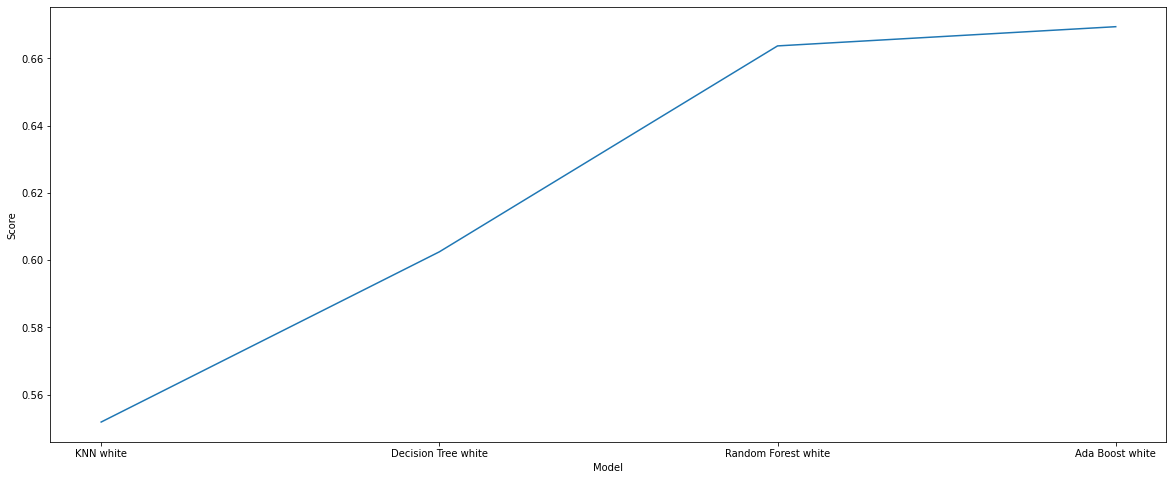

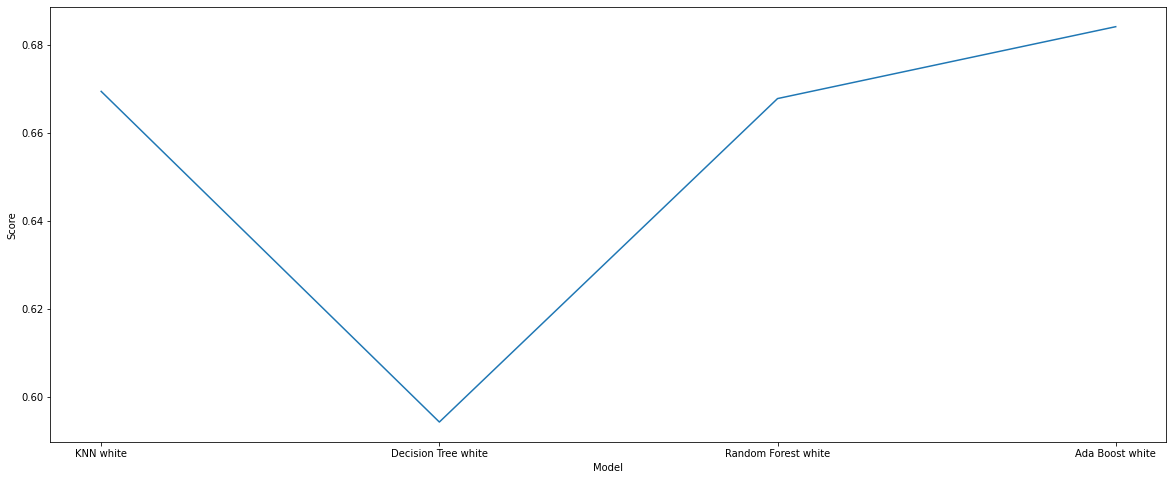

In [22]:
# Accuracy without hyper-parameters
plt.figure(figsize=(20, 8))
plt.title('White wine Accuracy without hyper-parameters')

sns.lineplot(x='Model', y='Score', data=models_pre_white)

# Accuracy using best hyper-parameters from GridSearchCV
plt.figure(figsize=(20, 8))
plt.title('White wine Accuracy using best hyper-parameters from GridSearchCV')
sns.lineplot(x='Model', y='Score', data=models_post_white)
plt.show()

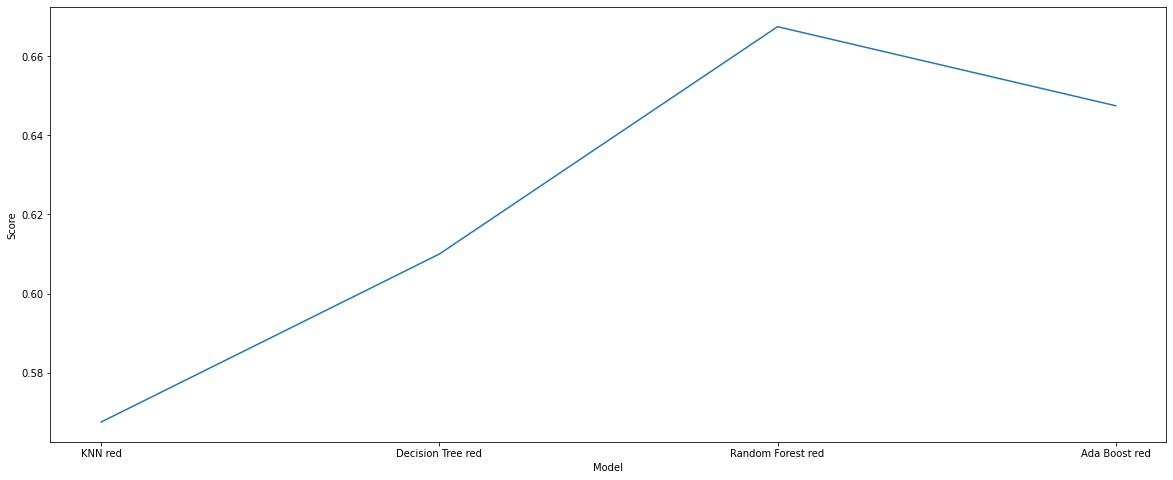

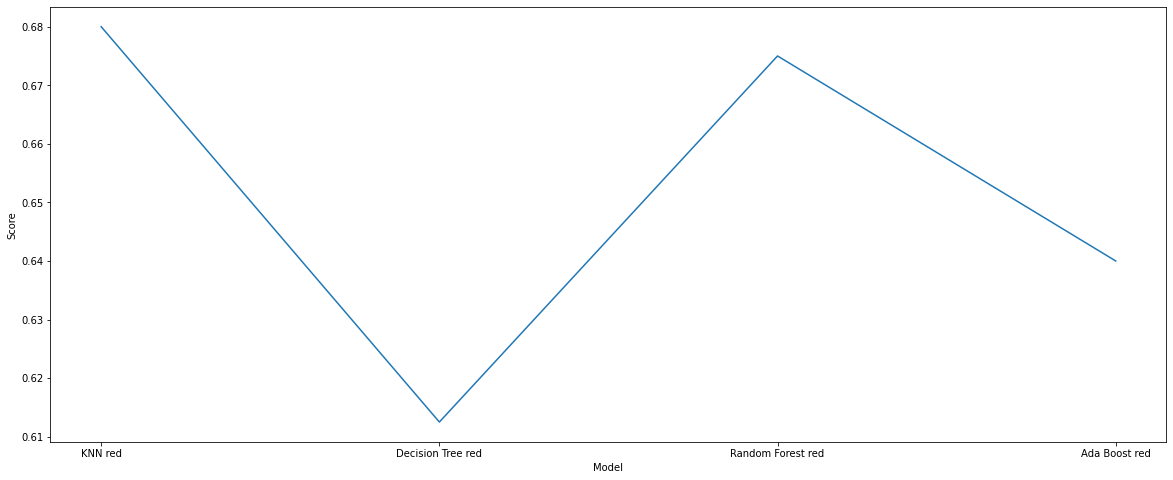

In [23]:
# Accuracy without hyper-parameters
plt.figure(figsize=(20, 8))
plt.title('Red wine Accuracy without hyper-parameters')
sns.lineplot(x='Model', y='Score', data=models_pre_red)

# Accuracy using best hyper-parameters from GridSearchCV
plt.figure(figsize=(20, 8))
plt.title('Red wine Accuracy using best hyper-parameters from GridSearchCV')
sns.lineplot(x='Model', y='Score', data=models_post_red)
plt.show()

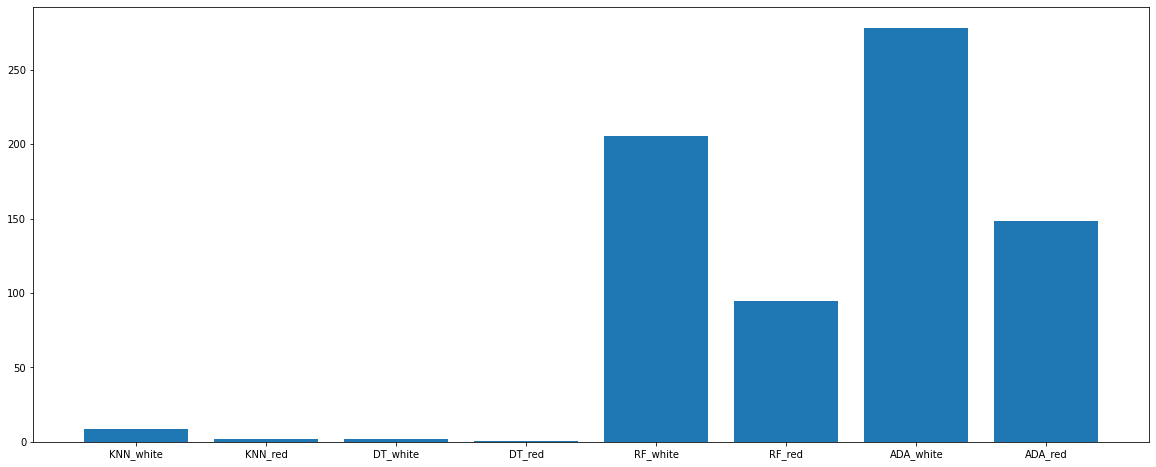

In [24]:
# How long each classifier took
plt.figure(figsize=(20, 8))
plt.bar(range(len(time_dict)), list(time_dict.values()), align='center')
plt.xticks(range(len(time_dict)), list(time_dict.keys()))

plt.show()

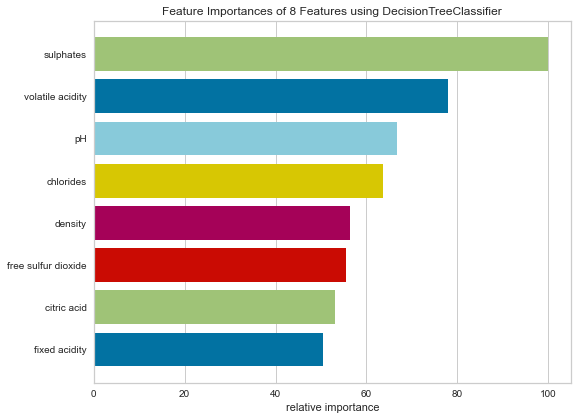

<Figure size 576x396 with 0 Axes>

In [103]:
fig = plt.figure(figsize=(15,6))

ax2 = plt.subplot(122)
viz2 = FeatureImportances(dt2_white)
viz2.fit(X_wines, y_wines)
viz2.show()

plt.tight_layout()

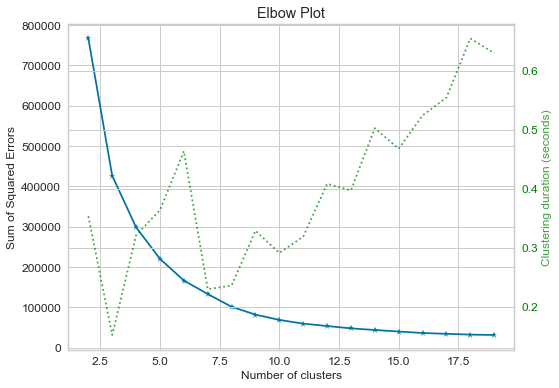

In [108]:
from sklearn.cluster import KMeans
skplt.cluster.plot_elbow_curve(KMeans(random_state=1),
                               X_wines,
                               cluster_ranges=range(2, 20),
                               figsize=(8,6));

C:\Users\Anton\AppData\Local\Temp\ipykernel_27628\168934014.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 4], X[:, 8], c=labels.astype(np.float), alpha=.5)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


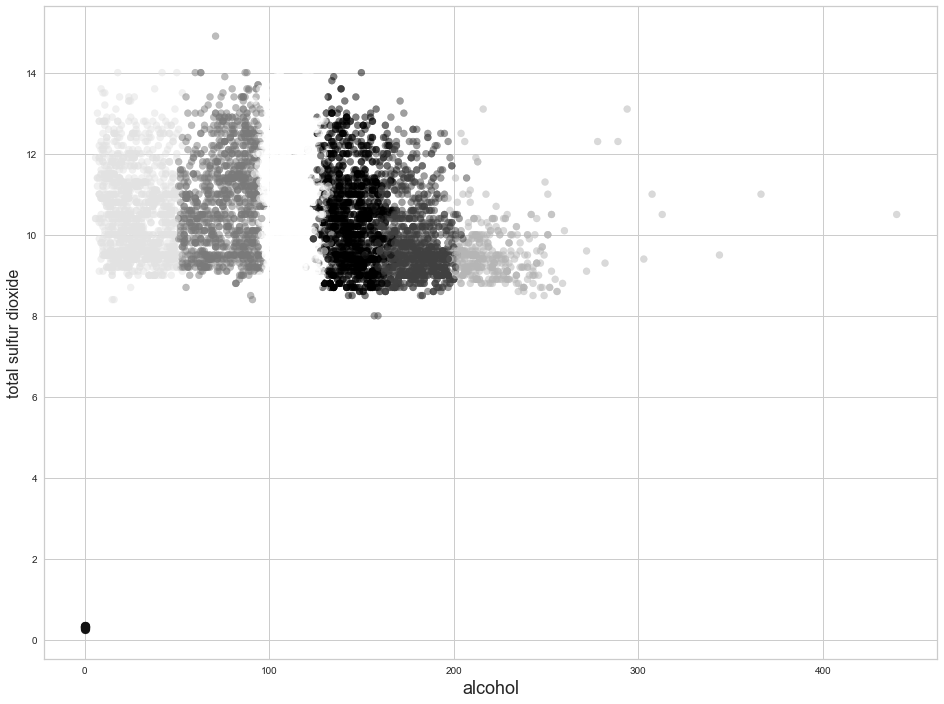

In [158]:
#Getting unique labels
X = X_wines.values[:, 1:]
Clus_dataset = StandardScaler().fit_transform(X)

#Initialize the class object
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
labels = kmeans.labels_

X_wines['Clus_km'] = labels

centroids = kmeans.cluster_centers_
u_labels = np.unique(labels)

#plotting the results:


#create 2 dimensional graph
f3, ax = plt.subplots(figsize=(16, 12))
plt.scatter(X[:, 4], X[:, 8], c=labels.astype(np.float), alpha=.5)
plt.xlabel('alcohol', fontsize=18)
plt.ylabel('total sulfur dioxide', fontsize=16)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()